## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

## Importing and Reading Data as DataFrame

In [2]:
df = pd.read_csv("../data/train__.csv")
df.shape

(1460, 68)

## Getting Info about data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   MasVnrArea     1460 non-null   float64
 3   BsmtFinSF1     1460 non-null   float64
 4   BsmtFinSF2     1460 non-null   float64
 5   BsmtUnfSF      1460 non-null   float64
 6   2ndFlrSF       1460 non-null   float64
 7   LowQualFinSF   1460 non-null   float64
 8   WoodDeckSF     1460 non-null   float64
 9   OpenPorchSF    1460 non-null   float64
 10  EnclosedPorch  1460 non-null   float64
 11  3SsnPorch      1460 non-null   float64
 12  ScreenPorch    1460 non-null   float64
 13  PoolArea       1460 non-null   float64
 14  MiscVal        1460 non-null   float64
 15  YrSold         1460 non-null   float64
 16  MSZoning       1460 non-null   int64  
 17  Street         1460 non-null   int64  
 18  LotShape

### Basic Data Analysis

In [4]:
print(df.shape)
print(df.head())

(1460, 68)
   LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0    -0.229372 -0.207142    0.511418    0.575425   -0.288653  -0.944591   
1     0.451936 -0.091886   -0.574410    1.171992   -0.288653  -0.641228   
2    -0.093110  0.073480    0.323060    0.092907   -0.288653  -0.301643   
3    -0.456474 -0.096897   -0.574410   -0.499274   -0.288653  -0.061670   
4     0.633618  0.375148    1.364570    0.463568   -0.288653  -0.174865   

   2ndFlrSF  LowQualFinSF  WoodDeckSF  OpenPorchSF  ...  BsmtHalfBath  \
0  1.161852     -0.120242   -0.752176     0.216503  ...             0   
1 -0.795163     -0.120242    1.626195    -0.704483  ...             1   
2  1.189351     -0.120242   -0.752176    -0.070361  ...             0   
3  0.937276     -0.120242   -0.752176    -0.176048  ...             0   
4  1.617877     -0.120242    0.780197     0.563760  ...             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         

## EDA, Feature Engineering and Feature Selection

### Analysis : 
##### There are various categorical columns in numerical data like there are many columns with cardinal features.
##### We found out the list of numerical and categorical features as some of the categorical features were labelled as Numerical.
##### List of columns categorised as numerical but have cardinal features
##### ["MSSubClass",  "OverallQual", "OverallCond", "BstFullBath", "BstHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "MoSold"]
##### TimeSeries columns : ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]
##### MasVnrArea has around 60 % of values as Zero.
##### BsmtFinSF1 has 32% of values as Zero.
##### BsmtFinSF2 has 88% of values as Zero.
##### 2ndFlrSF has 56% of values as Zero.
##### LowQualFinSF has 98% of values as Zero.
##### WoodDeckSF has 52% of values as Zero.
##### OpenPorchSF has 45% of values as Zero.
##### EnclosedPorch has 85% of values as Zero.
##### 3SsnPorch has 98% of values as Zero.
##### ScreenPorch has 92% of values as Zero.
##### PoolArea has 99% of values as Zero.
##### MiscVal has 96% of values as Zero.
##### Alley column has 93% of missing data.
##### FireplaceQu has 47% of missing data.
##### PoolQC has 99% of missing data.
##### Fence has 80% of Missing data.
##### MiscFeature has 96% of missing data.

### Feature Selection : 
##### Dropping Columns with more than 40% Missing data.
##### Removing Highly Correlated Features such as 
##### ['YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'YearBuilt']

##### Data Shape dropped from (1460, 81) to (1460, 68)

### Feature Engineering : 
##### Imputed Numerical_data using Mean Imputation and Categorical_data using mosst_frequent/mode imputation.
##### Transformed Numerical data using Standard Scalar and Categorical Data using Label Encoding

### Splitting Target and Train test Splits

In [5]:
target = df['SalePrice']
df = df.drop(['SalePrice'], axis=1)

In [6]:
target.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1460, dtype: bool

In [7]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [8]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

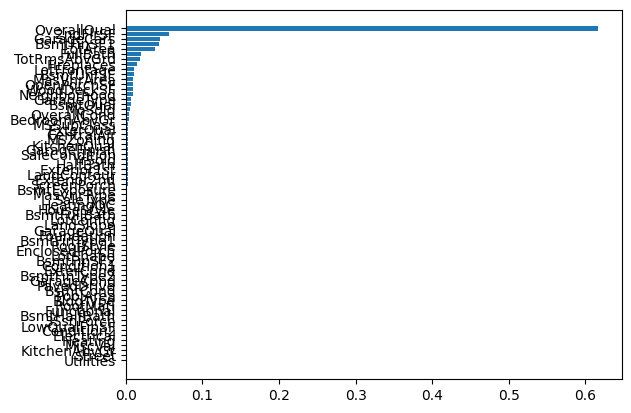

In [9]:
rf = RandomForestRegressor(random_state=0)

rf.fit(df, target)

f_i = list(zip(df.columns,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

#### Taking first 10 top features

In [10]:
sorted(f_i, reverse=True)

[('YrSold', 0.002575309394954284),
 ('WoodDeckSF', 0.009218731372380893),
 ('Utilities', 6.519511577950291e-06),
 ('TotRmsAbvGrd', 0.018438646303961307),
 ('Street', 5.295741126862809e-05),
 ('ScreenPorch', 0.002324764577281145),
 ('SaleType', 0.0016418578625459392),
 ('SaleCondition', 0.0027037200064084633),
 ('RoofStyle', 0.0012473289534706805),
 ('RoofMatl', 0.0003914705743729436),
 ('PoolArea', 0.000619861436528225),
 ('PavedDrive', 0.0006873883132325827),
 ('OverallQual', 0.6166691413868008),
 ('OverallCond', 0.004167453506583242),
 ('OpenPorchSF', 0.009713774766971852),
 ('Neighborhood', 0.009215527467551898),
 ('MoSold', 0.005645254264461878),
 ('MiscVal', 0.00010768600296592976),
 ('MasVnrType', 0.001684450638344455),
 ('MasVnrArea', 0.00984175470848021),
 ('MSZoning', 0.0028986486466495067),
 ('MSSubClass', 0.003296287508831014),
 ('LowQualFinSF', 0.0003254131166094836),
 ('LotShape', 0.0010746599535734799),
 ('LotFrontage', 0.010867926638206444),
 ('LotConfig', 0.001357095380

In [11]:
top_6_features = ['OverallQual', '2ndFlrSF', 'GarageCars', 'BsmtFinSF1', 'LotArea', 'FullBath']

In [12]:
df = df[['OverallQual', '2ndFlrSF', 'GarageCars', 'BsmtFinSF1', 'LotArea', 'FullBath']]

### Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.33, random_state=42)

### Modeling

In [14]:
regr = RandomForestRegressor(max_depth=7, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, random_state=0)

In [15]:
preds = regr.predict(X_test)

In [16]:
preds

array([135945.47126896, 290074.83076079, 129941.8175288 , 158778.96208668,
       364628.10659246,  78380.6977055 , 204981.50590684, 158809.33288338,
        77329.67148172, 129957.76689507, 161005.45135518, 132968.05614878,
       124525.54395071, 198593.1625251 , 178498.96290648, 130611.49588447,
       194668.30438671, 125889.05365245, 125928.26058086, 227659.43643128,
       149914.10160481, 233836.3613945 , 178949.85197887, 110653.87193061,
       195851.79717644, 178211.08664455, 193735.55029021, 127194.45023778,
       177811.23589027, 184646.91610162, 126600.85466023, 263667.20504406,
       148301.97003316, 101082.22211799, 269673.38761951, 138431.81978163,
       136235.61679252, 217738.63669989, 334648.22416784, 129968.3941383 ,
       129792.39715499, 208320.4709094 , 129598.40476656, 268349.1963667 ,
       148471.17132174, 154230.23058483, 122395.14390493, 130391.92124049,
       407560.18378405, 148333.5855007 , 127440.68961378, 185606.35287431,
       113792.03749157, 2

In [17]:
def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)

In [18]:
print(compute_rmsle(y_test, preds))

0.18


In [19]:
from sklearn.metrics import r2_score
print(r2_score(y_test, preds))

0.8382496174177267
